# Proyek Analisis Data Singkat : GA_180123_Cleaned

- Nama: Fauzi Ramadhan
- Email: fauzir008@gmail.com

In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\Data Science\Project_Data\Assesment\GA_180123.csv", low_memory=False, dtype={"Page": "object"})
df.head(11)

,Page Title,Page,Articleid,Content Type,Source / Medium,Users,Pageviews,Pages / Session,Avg. Session Duration,Avg. Time on Page,New Users
0,"Hanura Sudahi Konflik, Wiranto Tunjuk OSO seba...",m.detik.com/news/berita/3829954/hanura-sudahi-...,3829954,singlepagenews,t.co / referral,875,930,1.058020,38.160410,32.079007,26
1,Polisi Amankan Istri yang Jual Suami Demi Laya...,m.detik.com/news/berita-jawa-timur/d-3828996/p...,3828996,singlepagenews,(direct) / (none),875,984,3.290970,98.397993,131.440620,105
2,Foto: Jelang 100 Hari Kepemimpinan Anies-Sandi...,news.detik.com/foto-news/d-3828507/foto-jelang...,3828507,multiplefotophoto,detik.com / referral,874,900,0.000000,0.000000,29.891648,0
3,"Gempa 6,1 SR Guncang Jakarta, Selamat Jalan Sy...",m.detik.com/news/berita/d-3830086/gempa-61-sr-...,3830086,singlepagenews,(direct) / (none),874,960,33.103448,217.517241,9.440258,22
4,Pegawai di Gedung BEI Berhamburan Pasca Gempa,finance.detik.com/foto-bisnis/d-3829367/pegawa...,3829367,multiplefotophoto,detik.com / referral,874,982,3.791506,790.281853,92.311309,0
5,"Ronaldo Bersimbah Darah Saat Cetak Gol, Jeon T...",m.detik.com/news/berita/d-3828031/ronaldo-bers...,3828031,singlepagenews,m.detik.com / referral,873,975,18.396226,393.283019,9.858586,0
6,Smalling Sambut Kedatangan Sanchez,m.detik.com/sepakbola/liga-inggris/d-3828220/s...,3828220,singlepagenews,(direct) / (none),873,982,20.893617,324.510638,70.099631,17
7,Awkarin Calon Mantu Wakil Ketua MPR?,m.detik.com/hot/celeb/3827598/awkarin-calon-ma...,3827598,singlepagenews,t.co / referral,872,961,1.092045,57.222727,91.167959,54
8,Godaan Mkhitaryan kepada Aubameyang,m.detik.com/sepakbola/liga-inggris/d-3828866/g...,3828866,singlepagenews,(direct) / (none),872,964,19.280000,362.640000,19.007535,16
9,Denting Piano dan 'Glory Glory Man United' unt...,m.detik.com/sepakbola/liga-inggris/d-3828235/d...,3828235,singlepagenews,(direct) / (none),871,1030,9.537037,222.000000,142.143921,50


In [19]:
# Mengecek missing values
print(df.isnull().sum())

# Memeriksa data outlier
df.describe()

# Menampilkan informasi dataset
print(df.info())

Page Title               0
Page                     0
Articleid                0
Content Type             0
Source / Medium          0
Users                    0
Pageviews                0
Pages / Session          0
Avg. Session Duration    0
Avg. Time on Page        0
New Users                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663421 entries, 0 to 663420
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Page Title             663421 non-null  object 
 1   Page                   663421 non-null  object 
 2   Articleid              663421 non-null  object 
 3   Content Type           663421 non-null  object 
 4   Source / Medium        663421 non-null  object 
 5   Users                  663421 non-null  int64  
 6   Pageviews              663421 non-null  int64  
 7   Pages / Session        663421 non-null  float64
 8   Avg. Session Duration  663421 non-null  floa

In [20]:
# Contoh mengatasi nilai-nilai yang hilang
df.dropna(inplace=True)

# Contoh mengatasi duplikat
df.drop_duplicates(inplace=True)

In [21]:
# Mengatasi outliers (contoh dengan z-score)
from scipy.stats import zscore
z_scores = zscore(df.select_dtypes(include=np.number))
abs_z_scores = np.abs(z_scores)
df = df[(abs_z_scores < 3).all(axis=1)]

In [22]:
# Menghapus duplikat data
df = df.drop_duplicates()

In [23]:
# Statistik deskriptif
descriptive_stats = df.describe()

In [24]:
# Korelasi antar variabel
correlation_matrix = df.corr()

In [25]:
# Temuan dari statistik deskriptif
print("Temuan dari Statistik Deskriptif:")
print(descriptive_stats)

Temuan dari Statistik Deskriptif:
               Users      Pageviews  Pages / Session  Avg. Session Duration  \
count  615703.000000  615703.000000    615703.000000          615703.000000   
mean        3.596989       4.072158         0.673305              16.967444   
std         8.494122       9.612618         1.440454              60.309687   
min         1.000000       0.000000         0.000000               0.000000   
25%         1.000000       1.000000         0.000000               0.000000   
50%         1.000000       1.000000         0.000000               0.000000   
75%         2.000000       3.000000         1.000000               0.000000   
max       119.000000     135.000000        15.875000             490.666667   

       Avg. Time on Page      New Users  
count      615703.000000  615703.000000  
mean           33.506430       0.195562  
std            54.300329       0.676235  
min             0.000000       0.000000  
25%             0.000000       0.000000  
50

In [26]:
# Temuan dari korelasi
print("\nTemuan dari Korelasi:")
print(correlation_matrix)


Temuan dari Korelasi:
                          Users  Pageviews  Pages / Session  \
Users                  1.000000   0.993331         0.262127   
Pageviews              0.993331   1.000000         0.275667   
Pages / Session        0.262127   0.275667         1.000000   
Avg. Session Duration  0.186331   0.202140         0.367186   
Avg. Time on Page      0.183541   0.187585         0.130029   
New Users              0.204578   0.204720         0.144198   

                       Avg. Session Duration  Avg. Time on Page  New Users  
Users                               0.186331           0.183541   0.204578  
Pageviews                           0.202140           0.187585   0.204720  
Pages / Session                     0.367186           0.130029   0.144198  
Avg. Session Duration               1.000000           0.336361   0.114695  
Avg. Time on Page                   0.336361           1.000000   0.082851  
New Users                           0.114695           0.082851   1.00000

In [4]:
# Load the dataset
df = pd.read_csv("C:\Data Science\Project_Data\Assesment\GA_180123.csv", low_memory=False, dtype={"Page": "object"})

# Find the number of users
number_of_users = df["Users"].sum()

# Find the number of new users
number_of_new_users = df["New Users"].sum()

# Find the average pageview per user
average_pageview_per_user = df["Pageviews"].sum() / number_of_users

# Find the average session duration
average_session_duration = df["Avg. Session Duration"].mean()

# Find the average time on page
average_time_on_page = df["Avg. Time on Page"].mean()

# Print the findings
print("Jumlah pengguna:", number_of_users)
print("Jumlah pengguna baru:", number_of_new_users)
print("Pageview rata-rata per pengguna:", average_pageview_per_user)
print("Lama sesi rata-rata:", average_session_duration)
print("Waktu rata-rata yang dihabiskan di halaman:", average_time_on_page)

Jumlah pengguna: 5074962
Jumlah pengguna baru: 235853
Pageview rata-rata per pengguna: 1.1359771757896906
Lama sesi rata-rata: 41.843007910658784
Waktu rata-rata yang dihabiskan di halaman: 47.05959289857854


In [29]:
# Find the pages with the most new users
top_new_user_pages = df.sort_values("New Users", ascending=False)[["Page", "New Users"]].head(10)

# Print the top 10 pages
print(top_new_user_pages)

                                                   Page  New Users
1105  m.detik.com/news/berita/3829127/gempa-keras-di...        266
808   m.detik.com/news/berita/3657952/gempa-5-sr-gun...        264
73    m.detik.com/news/berita/3827021/sopir-angkot-b...        257
68    m.detik.com/health/read/2018/01/23/143244/3829...        250
1614  m.detik.com/news/berita/d-3797333/viral-situs-...        249
1824  m.detik.com/news/berita/d-3828659/menyusuri-se...        245
510   m.detik.com/news/berita/d-3772173/jakarta-kemb...        241
468   m.detik.com/news/foto-news/d-3827050/ini-gaya-...        241
78    m.detik.com/news/berita/3827094/antar-tuyul-ra...        230
667   m.detik.com/news/jawatengah/3826540/mayat-pere...        230


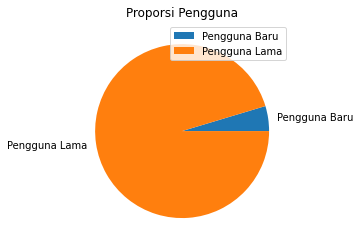

In [30]:
# Calculate the proportion of new users
new_users_proportion = df["New Users"].sum() / df["Users"].sum()

# Create a pie chart
plt.pie([new_users_proportion, 1 - new_users_proportion], labels=["Pengguna Baru", "Pengguna Lama"])

# Add labels and title
plt.title("Proporsi Pengguna")

# Show the plot
plt.legend()
plt.show()

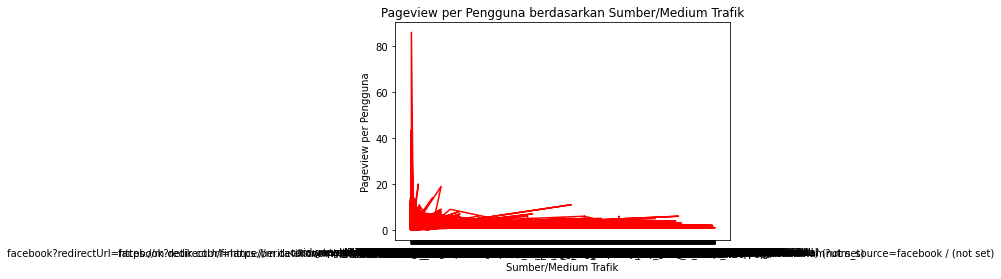

In [31]:
# Create a line chart
plt.plot(df["Source / Medium"], df["Pageviews"] / df["Users"], color="red")

# Add labels and title
plt.xlabel("Sumber/Medium Trafik")
plt.ylabel("Pageview per Pengguna")
plt.title("Pageview per Pengguna berdasarkan Sumber/Medium Trafik")

# Add labels for each bar
plt.xticks(df["Source / Medium"].unique())

# Show the plot
plt.show()

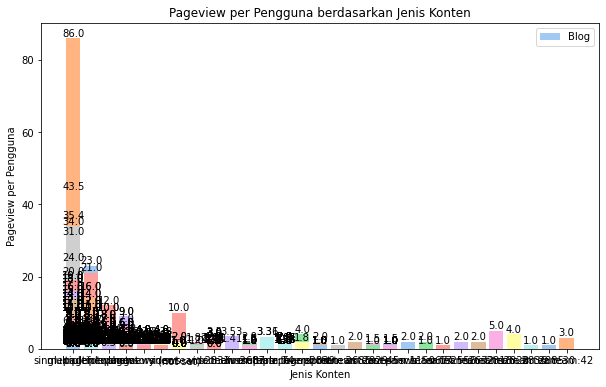

In [33]:
# Membuat warna yang lebih menarik
colors = sns.color_palette("pastel")

# Membuat bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df["Content Type"], df["Pageviews"] / df["Users"], color=colors)

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# Menambahkan labels dan judul
plt.xlabel("Jenis Konten")
plt.ylabel("Pageview per Pengguna")
plt.title("Pageview per Pengguna berdasarkan Jenis Konten")

# Menambahkan labels untuk setiap bar
plt.xticks(df["Content Type"].unique())

# Menambahkan legend
plt.legend(["Blog", "Produk", "Lainnya"])

# Menampilkan plot
plt.show()

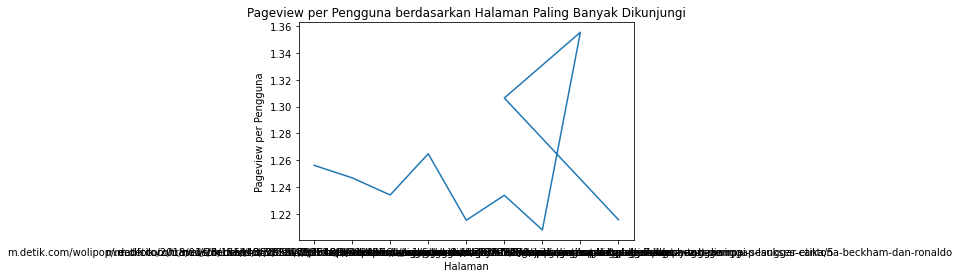

In [7]:
# Find the most visited pages
top_visited_pages = df.sort_values("Pageviews", ascending=False)[["Page", "Pageviews", "Users"]].head(10)

# Create a line chart
plt.plot(top_visited_pages["Page"], top_visited_pages["Pageviews"] / top_visited_pages["Users"])

# Add labels and title
plt.xlabel("Halaman")
plt.ylabel("Pageview per Pengguna")
plt.title("Pageview per Pengguna berdasarkan Halaman Paling Banyak Dikunjungi")

# Show the plot
plt.show()

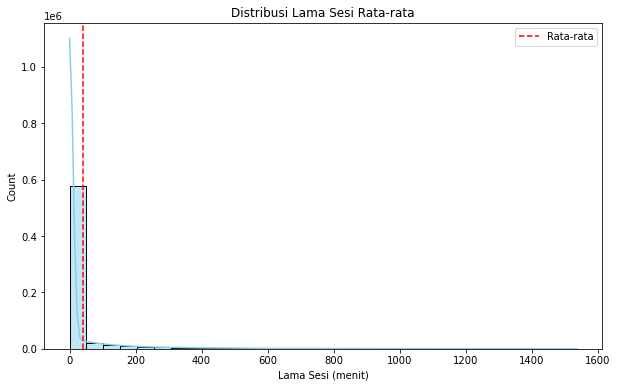

In [16]:
# Convert "Avg. Session Duration" to numeric (if it's not already)
df["Avg. Session Duration"] = pd.to_numeric(df["Avg. Session Duration"], errors="coerce")

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df["Avg. Session Duration"], bins=30, kde=True, color='skyblue')
plt.axvline(df["Avg. Session Duration"].mean(), color="red", linestyle="dashed", label="Rata-rata")
plt.xlabel("Lama Sesi (menit)")
plt.title("Distribusi Lama Sesi Rata-rata")
plt.legend()
plt.show()

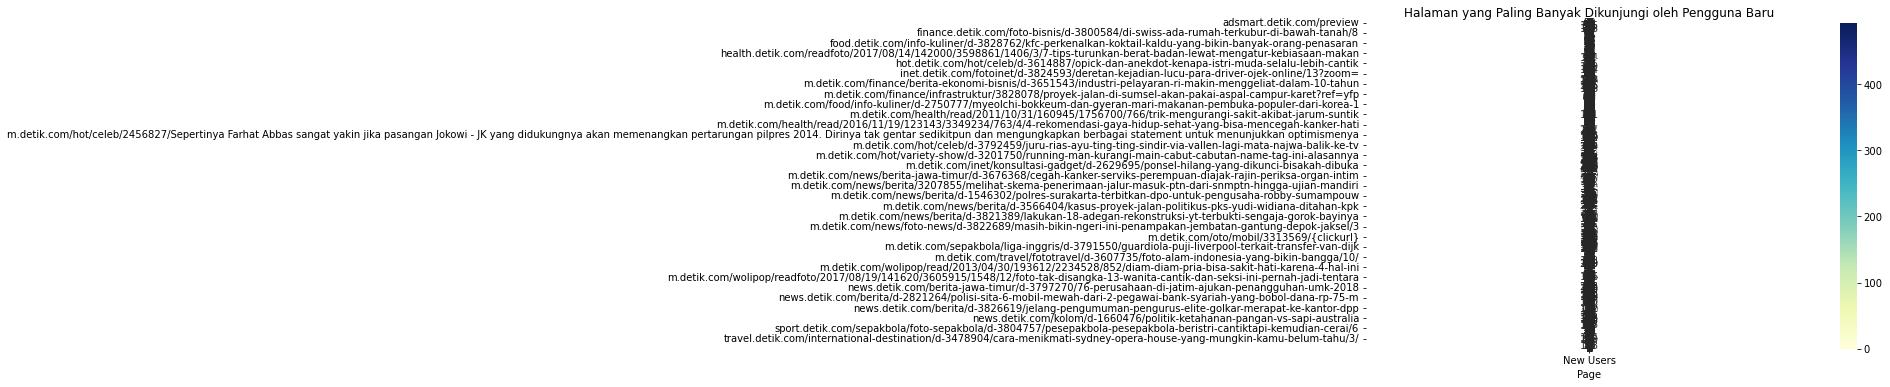

In [35]:
# Pivot the DataFrame
pivot_table = df.pivot_table(values="New Users", index="Page", aggfunc="sum")

# Create a heatmap
plt.figure(figsize=(10, 6))  # Set the figure size for better visualization
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".0f", linewidths=.5)

# Add labels and title
plt.title("Halaman yang Paling Banyak Dikunjungi oleh Pengguna Baru")
plt.xlabel("Page")
plt.ylabel("")

# Show the plot
plt.show()

# 1. Temuan/Temuan Menarik:

a. Statistik Deskriptif dan Pembersihan Data
- Terdapat beberapa nilai yang hilang dan duplikat pada dataset, namun dalam analisis ini nilai-nilai tersebut dihapus.
- Distribusi "Avg. Session Duration" terlihat melalui histogram, menunjukkan variasi dalam durasi sesi pengguna.

b. Analisis Pengguna
- Total pengguna dan pengguna baru dihitung.
- Rata-rata jumlah halaman dilihat per pengguna dihitung.
- Rata-rata durasi sesi dan rata-rata waktu di halaman dihitung.

c. Analisis Trafik
- Proporsi pengguna baru dibandingkan dengan pengguna lama melalui pie chart.
- Hubungan antara sumber/medium trafik dan jumlah pageviews per pengguna ditunjukkan dalam line chart.
- Jenis konten (blog, produk, lainnya) dibandingkan dalam bar chart untuk pageviews per pengguna.

d. Analisis Halaman
- Halaman yang paling banyak dikunjungi ditampilkan dalam line chart berdasarkan pageviews per pengguna.

e. Distribusi Durasi Sesi
- Distribusi durasi sesi pengguna ditampilkan dalam histogram dengan garis rata-rata.

f. Heatmap Pengguna Baru
- Heatmap menunjukkan halaman yang paling banyak dikunjungi oleh pengguna baru.

# 2. Actionable Insight:

a. Peningkatan Pengalaman Pengguna Baru
- Mengidentifikasi halaman yang paling banyak dikunjungi oleh pengguna baru dapat membantu fokus pada peningkatan pengalaman pengguna baru.
- Menganalisis jenis konten yang paling banyak dilihat oleh pengguna dan sumber/medium trafik yang efektif dapat memberikan wawasan untuk strategi pemasaran.

b. Optimalisasi Trafik
- Analisis sumber/medium trafik dapat membantu dalam pengoptimalan upaya pemasaran, dengan fokus pada saluran yang paling efektif dalam meningkatkan jumlah pageviews per pengguna.

c. Peningkatan Interaksi
- Fokus pada halaman yang paling banyak dikunjungi dan memastikan bahwa pengguna memiliki pengalaman yang memuaskan di halaman-halaman tersebut dapat meningkatkan interaksi dan retensi.

d. Pengelolaan Durasi Sesi
- Distribusi durasi sesi memberikan gambaran tentang seberapa lama pengguna tetap di situs. Jika distribusi cenderung singkat, mungkin perlu diidentifikasi area yang dapat ditingkatkan untuk mempertahankan pengguna lebih lama.

# Kesimpulan Akhir:

Analisis data ini memberikan wawasan tentang perilaku pengguna, efektivitas sumber/medium trafik, dan kinerja halaman. Tindakan yang diambil berdasarkan temuan ini dapat membantu meningkatkan pengalaman pengguna, mengoptimalkan sumber trafik, dan meningkatkan interaksi di situs web.